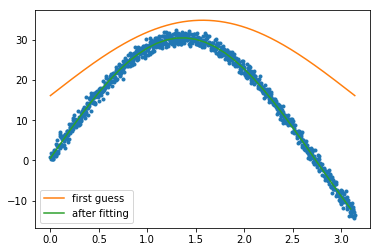

In [11]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt
import calendar


N = 1000 # number of data points
t = np.linspace(0, 1*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = 30.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

samples 96
check time
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
length of time 96 
check amplitude
[0.         0.03269417 0.06535339 0.09794273 0.13042735 0.16277252
 0.19494365 0.22690635 0.25862645 0.29007002 0.32120345 0.35199345
 0.3824071  0.41241188 0.44197572 0.471067   0.49965461 0.527708
 0.55519716 0.58209271 0.60836589 0.63398861 0.65893347 0.6831738
 0.70668369 0.72943799 0.75141239 0.77258337 0.79292832 0.81242547
 0.83105398 0.84879393 0.86562635 0.88153325 0.89649762 0.91050347
 0.9235358  0.93558069 0.94662527 0.95665772 0.96566732 0.97364443
 0.98058053 0.98646819 0.99130113 0.99507417 0.99778328 0.99942557
 0.99999928 0.9995038  0.99793965 0.99530851 0.99161319 0.98685765
 0.98104696 0.97418734 0.96628612 0.95735176 0.947

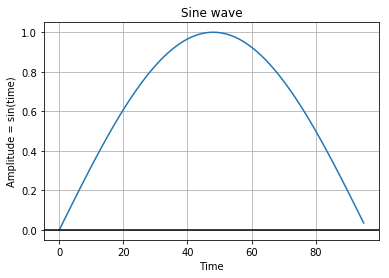

TIME simulated using slice 1
total_samples_in 0 
TIME     /   AMPLITUDE
0 0.0
time_now 1573810097 
TIME simulated using slice 2
total_samples_in 1 
TIME     /   AMPLITUDE
1 0.03269417268106342
time_now 1573810397 
TIME simulated using slice 3
total_samples_in 2 
TIME     /   AMPLITUDE
2 0.06535338892526794
time_now 1573810697 
TIME simulated using slice 4
total_samples_in 3 
TIME     /   AMPLITUDE
3 0.09794272967099245
time_now 1573810997 
TIME simulated using slice 5
total_samples_in 4 
TIME     /   AMPLITUDE
4 0.13042735056712998
time_now 1573811297 
TIME simulated using slice 6
total_samples_in 5 
TIME     /   AMPLITUDE
5 0.162772519228484
time_now 1573811597 
TIME simulated using slice 7
total_samples_in 6 
TIME     /   AMPLITUDE
6 0.19494365237145125
time_now 1573811897 
TIME simulated using slice 8
total_samples_in 7 
TIME     /   AMPLITUDE
7 0.2269063527902863
time_now 1573812197 
TIME simulated using slice 9
total_samples_in 8 
TIME     /   AMPLITUDE
8 0.25862644613441194
time_

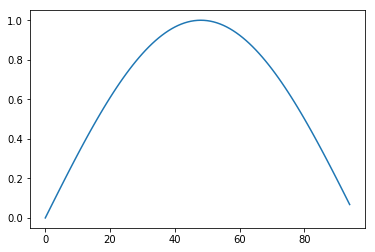

In [14]:
import numpy as np
import matplotlib.pyplot as plot
import time
import calendar
from time import gmtime, strftime
import logging


# shift length in seconds = 8 hours * 60 mins/hr * 60 sec/ min = 28800
period_secs = 8 * 60 *60

# time interval in seconds samples are being taken 5 mins/hr * 60 sec/ min = 300
time_interval = 5 * 60

# samples = period  (sec) / time interval (sec) = 96
samples =  int( period_secs /  time_interval)
print ("samples %d" %samples)

# frequency = 1 second / period =0.0000347
frequency =  1 / period_secs

# Get x values of the sine wave
A_time = np.arange(0, samples);
print("check time")
print(A_time)
print("length of time %d " %len(A_time))

# Amplitude of the sine wave is sine of a variable like time
amplitude = np.sin(A_time*.0327)
print("check amplitude")
print(amplitude)
print("length of amplitude %d " %len(amplitude))


# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(A_time, amplitude)

# Give a title for the sine wave plot
plot.title('Sine wave')

# Give x axis label for the sine wave plot
plot.xlabel('Time')

# Give y axis label for the sine wave plot
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

#initialize 
plot_time = []
plot_amplitude = []
time_now = calendar.timegm(gmtime())
time_start = time_now
logging.debug("time_now using calendar in epoch seconds %s "  %time_now )

for sample in range (1, len(A_time)) :    
    print ("TIME simulated using slice %d" %sample)
    total_samples_in = int( ( time_now  - int(time_start) )/(5*60) )
    print ("total_samples_in %d " %total_samples_in)
    
    # Amplitude of the sine wave is sine of a variable like time
    A_temp = np.sin(A_time[int(total_samples_in)] *.0327)
    
    # Amplitude of the sine wave is sine of a variable like time
    print("TIME     /   AMPLITUDE" )
    print(A_time[ int(total_samples_in)] , A_temp  )
    plot_time.append(A_time[int(total_samples_in)])
    plot_amplitude.append(A_temp)
    
    #Move forward in time one sample
    time_now = time_start + sample * 5 * 60
    print ("time_now %d " %time_now)

print("Plot time")
print(plot_time)
print("Amplitude")
print(plot_amplitude)
# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(plot_time, plot_amplitude)

In [2]:
import numpy as N
import math
f = 2
w = 2. * N.pi * f
# time_interval  is 5min samples in 8 hours
# 8hr shift * 60 min/hr /  5 min 
time_interval = 96
# 3  ( 8hr shifts) * 96 time intervals
samples = 288
time_step = 1573209477

t = N.linspace(0, time_interval, samples)
y = N.sin(w * t)
plt.plot(t, y)
plt.show()

print (currenttime)
# 1 day * 8 hour shift *  3 shifts in day   * 12 (5min saples in one hour)
for slice in range (1, samples):    
    print ("TIME simulated using slice %d" %slice)
    # slice *5min *60sec
    time_now = step + slice * 5 * 60
    #tic = 171
    total_tics_in = (time_now  - time_step)/(5*60)
    print ("total_tics_in %d " %total_tics_in)
    tics = total_tics_in/time_interval
    print("tics %d " %abs(tics) )
    frac, whole_tics = math.modf(abs(tics))
    print("frac %s "  %str(frac) )
    print("whole_tics %s "  %str(whole_tics) )

    xs = int(whole_tics*(samples/time_interval) + frac*(samples/time_interval) )
    print("TIME xs %d " %xs)
    print("TEMP-sim %d " %N.sin(w * t[xs])  )


NameError: name 'plt' is not defined

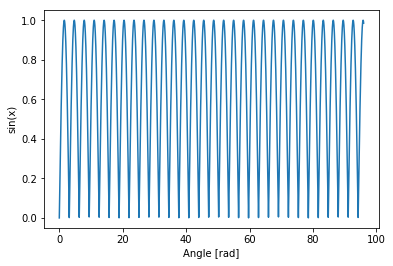

In [76]:
import types
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
A101_time = np.arange(0, 96, .01)
A101_temp = abs( np.sin(A101_time) )

x = A101_time
plt.plot(x, A101_temp)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [19]:
import calendar
import time
from time import gmtime, strftime
import random
import json

class Settings():
    
    def __init__(self):    
        A101FLATLINE_TEMP = 'None'
        A101FLATLINE_TIME = 'None'
        A101_INDEX = 'None'

    # ANomaly Temp
    def setenv_temp(self, temp ):
        self.A101FLATLINE_TEMP = temp
        return

    def getenv_temp(self):
        return self.FLATLINE_TEMP 

    #Anomaly Time
    def setenv_time(self, env_time ):
        self.A101FLATLINE_TIME  = env_time
        return

    def setenv_index(self, env_index ):
        self.A101_INDEX = str(env_index)
        return

    def getenv_index(self,):
        return self.A101_INDEX

print('class simulation model  - Entereed reading method -------')
settings = Settings()

# Initialiize variables for simulation
currenttime = calendar.timegm(gmtime())
print("currenttime  %s "  %strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime()) )
print("currenttime   %s "  %currenttime )


# Get STEP from user defined enviroment variables
try:
    # Get set the index to use for simulated data.  The index get incremented upto 30 steps (150 Mins)
    STEP = float(settings.getenv_index())
    print('STEP is set %s' %str(STEP))
    if settings.getenv_index() == "None":
        settings.setenv_index( 1 )
except Exception as e:
    STEP = float( 1 )
    settings.setenv_index( STEP )
    print("STEP was not yet set. Set to one now. %s"  %str(STEP ))

# Get x values of the sine wave for calculating temps and pressures using STEP
A101_time = np.arange(0, 12, 1)
B102_time = np.arange(0, 12, 1)
A101_temp = abs( np.sin(A101_time) )
B102_temp = abs( np.sin(B102_time) )
A101_press = abs( np.sin(A101_time) )
B102_press = abs( np.sin(B102_time) )
PRESS_X = 5

# Set simulated and predicted values without anomaly
simulated_A101_temp = float(A101_temp[int(STEP)])*80
simulated_B102_temp = float(B102_temp[int(STEP)])*90
simulated_A101_press = float(A101_press[int(STEP)])*200
simulated_B102_press = float(B102_press[int(STEP)])*220
simulated_PRESS_X = PRESS_X
predict_A101_temp = float(A101_temp[int(STEP)])*80
predict_B102_temp = float(B102_temp[int(STEP)])*90
predict_A101_press = float(A101_press[int(STEP)])*200
predict_B102_press = float(B102_press[int(STEP)])*220
predict_PRESS_X = PRESS_X

# Check if in Anomaly State using environment variables
# A101FLATLINE_TIME > 120 mins
try:
    # if A101FLATLINE_TIME is not set means you aren't in an anomaly state and need to initialize environment variabls.
    A101FLATLINE_TIME = settings.A101FLATLINE_TIME
    print('A101FLATLINE_TIME was set %s' %A101FLATLINE_TIME)
except Exception as e:
    print('A101FLATLINE_TIME was not yet set. Set to None. -------')
    A101FLATLINE_TIME = 'None'

'''
# In anmoaly state
'''
if A101FLATLINE_TIME != 'None':
    print(" ANOMALY STATE TRUE ")
    # Set anomvaly values for metrics
    # FLATLINE  A101_temp
    try:
        simulated_A101_temp = settings.getenv_temp()
        print('A101FLATLINE_TEMP is ------- %s' %str(simulated_A101_temp) )
    except Exception as e:
        # Set FLatline temp for the next 120 minutes
        settings.setenv_temp(simulated_A101_temp)

    # NOISEY LINE PRESS_X metric stops being flat
    simlated_PRESS_X = float(A101_temp[int(STEP)])*2

    # Check if anomaly period has expired or been resolved.
    # Turn off Flat line. since its been flat more than 120 minsutes
    print("currenttime - A101FLATLINE_TIME")
    if (currenttime - A101FLATLINE_TIME ) > 120:
        print("Time to exit anomaly state")
        # Set A101FLATLINE_TIME = 'None' and temp to 'None'
        settings.setenv_time( env_time = "None" )
        settings.setenv_temp( env_index = "None" )
else:
    # Not In anmoaly state
    print(">> ANOMALY STATE FALSE<< ")
    #  Check if we should start anomolies
    #  Use a random number to start generating Anomalies
    ran_number = random.randint(1, 144)
    print("random %s"  %ran_number)
    if ran_number  >  143 :
        print("Starting to create anomalies %s" %str(currenttime) )
        # Set flatline environment variables condition to current time and temp to flatlive at.
        settings.setenv_time( env_time = str(currenttime) )
        settings.setenv_temp( temp = str(simulated_A101_temp ) )

#increment simulation
incremented = STEP + 1
print("Incremented STEP and setenv_index to %s "  %str(incremented) )
settings.setenv_index( incremented )
print("Environemt A101_INDEX current value is incremented %s"  %str(settings.getenv_index() ) )

response_back = { "DEVICEID"  : ["A101","B102"],
    "TURBINE_ID"  : ["A101","B102"],
    "TEMPERATURE" : [ simulated_A101_temp, simulated_B102_temp],
    "PRESSURE"    : [ simulated_A101_press, simulated_B102_press ],
    "PREDICT_TEMPERATURE" : [ predict_A101_temp , predict_B102_temp ],
    "PREDICT_PRESSURE"    : [ predict_A101_press, predict_B102_press],
    "STEP" : [  STEP, STEP ],
    "A_TEMP_X" : [10,40],
    "A_TEMP_Y" : [10,20],
    "A_PRESS_X" : [30,60],
    "A_PRESS_Y" : [30,50],
    "B_TEMP_X" : [10,40],
    "B_TEMP_Y" : [10,20],
    "B_PRESS_X" : [30,50],
    "B_PRESS_Y" : [30,60],
    "TEMP_X" : [10,40],
    "TEMP_Y" : [10,20],
    "PRESS_X" : [simulated_PRESS_X,simulated_PRESS_X],
    "PREDICT_PRESS_X" : [predict_PRESS_X,predict_PRESS_X],
    "PRESS_Y" : [30,60],}
print('response_back ------- %s' %response_back)

# Reset the index to 1 if at the end ie 30 interval of the sine curve.
print("STEP is being checked if it's 30. %s"  %str(STEP) )
#print("Environemt A101_INDEX current value is %s"  %settings.getenv_index())
if STEP == 29:
    print("A101_INDEX == 29"  )
    settings.setenv_index( 1 )

metrics_json = json.loads(response_back.decode('utf') )
print( metrics_json )

for metric in metrics_json.keys():
    print( "looping on metric key %s " %metric )
    print( "looping on metrics %s " %metrics_json[metric] )
    if metric == 'TEMPERATURE':
        print( "Found TEMPERATURE %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'PREDICT_TEMPERATURE':
        print( "Found PREDICT_TEMPERATURE %s " %metrics_json[metric])
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'PRESSURE':
        print( "Found PRESSURE %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'PREDICT_PRESSURE':
        print( "Found PREDICT_PRESSURE %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'TURBINE_ID':
        print( "Found TURBINE_ID %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'STEP':
        print( "Found STEP %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'TEMP_X':
        print( "Found TEMP_X %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'TEMP_Y':
        print( "Found TEMP_Y %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'PRESS_X':
        print( "Found PRESS_X %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'PREDICT_PRESS_X':
        print( "Found PREDICT_PRESS_X %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'PRESS_Y':
        print( "Found PRESS_Y %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'A_TEMP_X':
        print( "Found A_TEMP_X %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'A_TEMP_Y':
        print( "Found A_TEMP_Y %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'A_PRESS_X':
        print( "Found A_PRESS_X %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'A_PRESS_Y':
        print( "Found A_PRESS_Y %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'B_TEMP_X':
        print( "Found B_TEMP_X %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'B_TEMP_Y':
        print( "Found B_TEMP_Y %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'B_PRESS_X':
        print( "Found B_PRESS_X %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'B_PRESS_Y':
        print( "Found B_PRESS_Y %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'CLIENT':
        print( "Found CLIENT %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'ORG':
        print( "Found ORG %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]
    if metric == 'FUNCTION':
        print( "Found FUNCTION %s " %metrics_json[metric] )
        net_metrics_data[metric] = metrics_json[metric]

print( "net_metrics_data %s " %net_metrics_data )
rows = len(net_metrics_data)

class simulation model  - Entereed reading method -------
currenttime  Fri, 08 Nov 2019 10:04:51 +0000 
currenttime   1573207491 
STEP was not yet set. Set to one now. 1.0
A101FLATLINE_TIME was not yet set. Set to None. -------
>> ANOMALY STATE FALSE<< 
random 23
Incremented STEP and setenv_index to 2.0 
Environemt A101_INDEX current value is incremented 2.0
response_back ------- {'DEVICEID': ['A101', 'B102'], 'TURBINE_ID': ['A101', 'B102'], 'TEMPERATURE': [67.31767878463172, 75.73238863271068], 'PRESSURE': [168.2941969615793, 185.12361665773724], 'PREDICT_TEMPERATURE': [67.31767878463172, 75.73238863271068], 'PREDICT_PRESSURE': [168.2941969615793, 185.12361665773724], 'STEP': [1.0, 1.0], 'A_TEMP_X': [10, 40], 'A_TEMP_Y': [10, 20], 'A_PRESS_X': [30, 60], 'A_PRESS_Y': [30, 50], 'B_TEMP_X': [10, 40], 'B_TEMP_Y': [10, 20], 'B_PRESS_X': [30, 50], 'B_PRESS_Y': [30, 60], 'TEMP_X': [10, 40], 'TEMP_Y': [10, 20], 'PRESS_X': [5, 5], 'PREDICT_PRESS_X': [5, 5], 'PRESS_Y': [30, 60]}
STEP is being c

AttributeError: 'dict' object has no attribute 'decode'

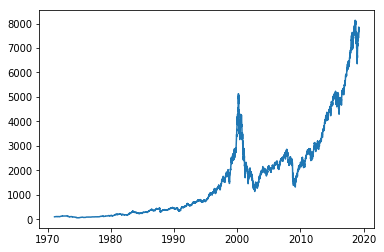

In [123]:
import matplotlib.pylab as plt
ts = data['High']
plt.plot(ts[:'2019-04-01'])

In [124]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=30)
    rolmean = timeseries.rolling(center=False,window=30).mean()
    #rolstd = pd.rolling_std(timeseries, window=30)
    rolstd = timeseries.rolling(center=False,window=30).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

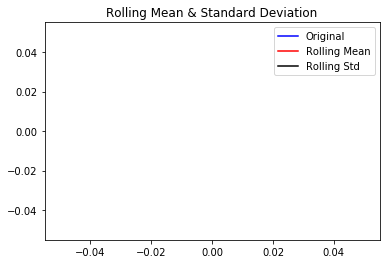

Results of Dickey-Fuller Test:


ValueError: maxlag should be < nobs

In [125]:
test_stationarity(ts['1980-04-01':'2015-04-01'])

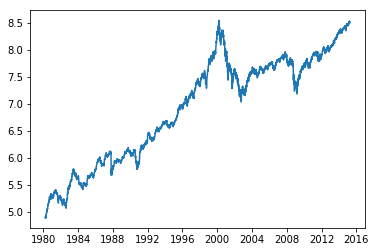

In [126]:
#Estimating and eliminating trend
import numpy as np
ts_log = np.log(ts['1980-04-01':'2015-04-01'])
plt.plot(ts_log)


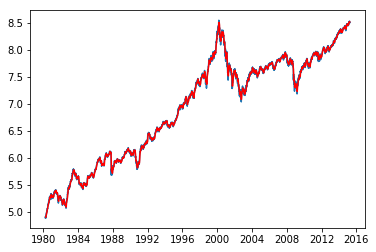

In [127]:
# Moving Average
# moving_avg = pd.rolling_mean(ts_log,12)
moving_avg = ts_log.rolling(center=False,window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [128]:
# The red line shows the rolling mean. Lets subtract this
# from the original series. Note that since we are taking average
# of last 12 values,  rolling mean is not defined for first 11 values.
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
1980-04-01         NaN
1980-04-02         NaN
1980-04-03         NaN
1980-04-07         NaN
1980-04-08         NaN
1980-04-09         NaN
1980-04-10         NaN
1980-04-11         NaN
1980-04-14         NaN
1980-04-15         NaN
1980-04-16         NaN
1980-04-17   -0.007696
Name: High, dtype: float64

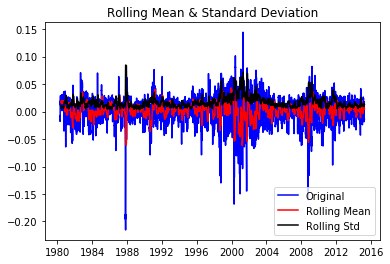

Results of Dickey-Fuller Test:
Test Statistic                -1.459388e+01
p-value                        4.271350e-27
#Lags Used                     2.600000e+01
Number of Observations Used    8.790000e+03
Critical Value (1%)           -3.431094e+00
Critical Value (5%)           -2.861869e+00
Critical Value (10%)          -2.566945e+00
dtype: float64


In [129]:
# Notice the first 11 being Nan. Lets drop these NaN values and 
# check the plots to test stationarity.
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

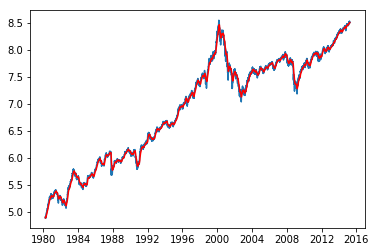

In [130]:
# Exponentially weighted moving average where weights are assigned to all 
# the previous values with a decay factor
expwighted_avg =ts_log.ewm(halflife=12).mean()

# expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

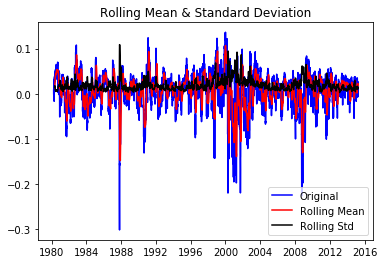

Results of Dickey-Fuller Test:
Test Statistic                -1.088298e+01
p-value                        1.280810e-19
#Lags Used                     3.400000e+01
Number of Observations Used    8.793000e+03
Critical Value (1%)           -3.431094e+00
Critical Value (5%)           -2.861869e+00
Critical Value (10%)          -2.566945e+00
dtype: float64


In [131]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

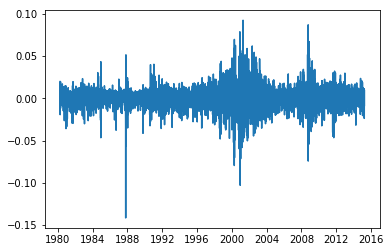

In [132]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

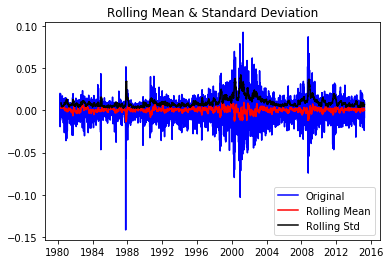

Results of Dickey-Fuller Test:
Test Statistic                -1.483809e+01
p-value                        1.855037e-27
#Lags Used                     3.300000e+01
Number of Observations Used    8.793000e+03
Critical Value (1%)           -3.431094e+00
Critical Value (5%)           -2.861869e+00
Critical Value (10%)          -2.566945e+00
dtype: float64


In [133]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

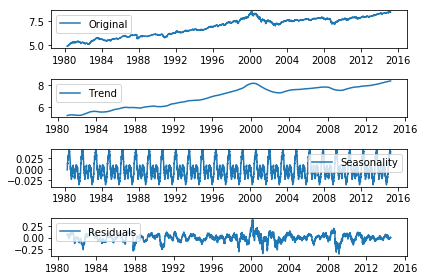

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

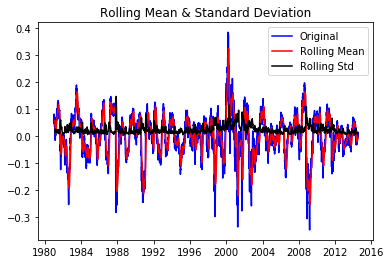

Results of Dickey-Fuller Test:
Test Statistic                -8.512080e+00
p-value                        1.160162e-13
#Lags Used                     3.400000e+01
Number of Observations Used    8.429000e+03
Critical Value (1%)           -3.431126e+00
Critical Value (5%)           -2.861883e+00
Critical Value (10%)          -2.566953e+00
dtype: float64


In [135]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

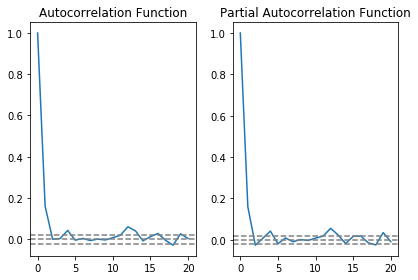

In [136]:
# ACF and PACF plots:  See https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle
# 5. Forecasting a Time Series
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/Users/carlosferreira/jupyter/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/carlosferreira/jupyter/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0772')

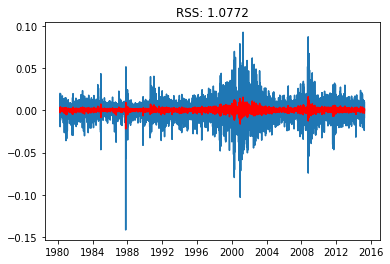

In [138]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


#train.index = pd.DatetimeIndex(train.index.values,
#                               freq=train.index.inferred_freq)
#fit1 = sm.tsa.statespace.SARIMAX(...)


/Users/carlosferreira/jupyter/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/carlosferreira/jupyter/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0772')

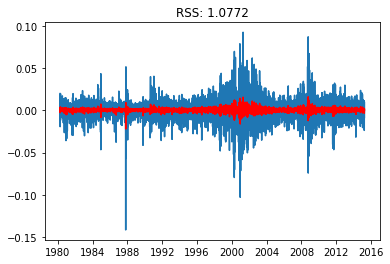

In [139]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/Users/carlosferreira/jupyter/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/carlosferreira/jupyter/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0756')

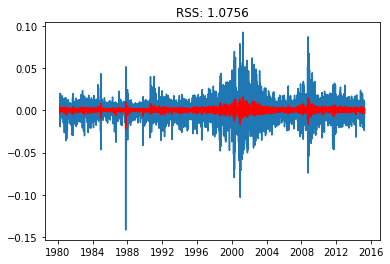

In [140]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [141]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head() )

Date
1980-04-02    0.000409
1980-04-03    0.003487
1980-04-07   -0.000050
1980-04-08   -0.003094
1980-04-09    0.002550
dtype: float64


In [147]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print ( predictions_ARIMA_diff_cumsum.head() )

print ( predictions_ARIMA_diff_cumsum.tail(12) )


Date
1980-04-02    0.000409
1980-04-03    0.003895
1980-04-07    0.003846
1980-04-08    0.000752
1980-04-09    0.003302
dtype: float64
Date
2015-03-17    3.604058
2015-03-18    3.604831
2015-03-19    3.606832
2015-03-20    3.606899
2015-03-23    3.608412
2015-03-24    3.608475
2015-03-25    3.608527
2015-03-26    3.608475
2015-03-27    3.604698
2015-03-30    3.606491
2015-03-31    3.608489
2015-04-01    3.607855
dtype: float64


In [143]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/Users/carlosferreira/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
1980-04-01    4.891401
1980-04-02    4.891810
1980-04-03    4.895297
1980-04-07    4.895247
1980-04-08    4.892153
dtype: float64

Text(0.5, 1.0, 'RMSE: nan')

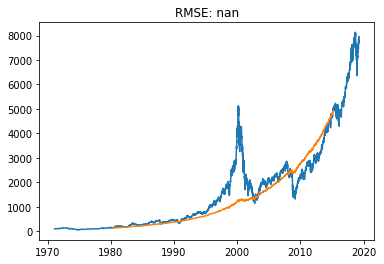

In [144]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))